В данном задании требуется работать с библиотекой Gym, которую не проходили в рамках этой лекции. На следующем занятии *Политические методы обучения, алгоритм REINFORCE* будет рассматриваться синтаксис этой библиотеки, но вы также можете найти синтаксис в документации и в шаблонных кодах, которые выложили в интернет.

В этом задании требуется реализовать классический алгоритм Q-обучения на среде 'Taxi-v3' - т.е. нельзя использовать нейронные сети, нужно использовать Q-таблицу. В данной среде всего 500 уникальных состояний, так что Q-таблица будет работать лучше и обучаться намного быстрее, чем нейронная сеть. 

Нужную документацию можно найти по следующей ссылке: https://gym.openai.com/envs/Taxi-v3/

Импортируем библиотеку gym.

In [ ]:
import gym         #Импортируем библиотеку gym (встроенная в колаб)
import numpy as np #Импортируем numpy
from tensorflow.keras.models import Sequential, load_model #Импортируем функцию для создания модели и загрузки модели
from tensorflow.keras.layers import * #Импортируем все слои кераса
from tensorflow.keras.optimizers import RMSprop #Импортируем оптимизатор RMSprop
import tensorflow as tf                    #Импортируем тензорфлоу
import matplotlib.pyplot as plt            #Импортируем pyplot для визуализации данных
import pickle                              #Импортируем модуль pickle для сохранения и загрузки данных
import random                              #Импортируем модуль для генерации рандомных чисел
from moviepy.editor import *               #Импортируем полезные функции из библиотеки для возпроизведение видео с результатом
import cv2                                 #Импортируем библиотеку cv2 (используется для воспроизведение видео)
from google.colab import output            #Импортируем функцию для управления вывода в колаб-ячейках

#Импортируем тип данных deque из встроенного модуля питона
from collections import deque   #deque - это список где автоматический удаляются старые значения при добовлении новых, чтобы не было переполнение памяти.

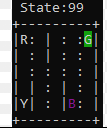

Мы будем взаимодействовать со средой, которая называется `taxi-v3`. Агент управляет такси, которая должна забирать пассажиров и доставлять их в указанные точки. Агент имеет 6 действий (забирать, доставлять, двигаться влево, двигаться вправо, двигаться вверх, двигаться вниз).

За неправильные действия (не взял пассажира, не туда сбросил пассажира, слишком долго вёз пассажира) назначаются отрициательные наргады. За своевременную доставку пассажира в нужное назначение даются положительные награды. По этому, цель алгоритма - обучиться правильно забирать и доставлять пассажиров.

In [ ]:
env = gym.make('Taxi-v3')          #Создаем игровую среду через библиотеку gym
state = env.reset()                #Начинаем новый эпизод, извлекаем состояние
print("Пример состояния:", state)  #Отображаем пример состояние (будет скалярное число)
print("Пространство действий:", env.action_space) #Смотрим на размер пространства действий

Пример состояния: 388
Пространство действий: Discrete(6)


In [ ]:
#Ваш код